In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [5]:
gym_data = pd.read_csv('https://github.com/taruntiwarihp/Projects_DS/blob/master/GYM%20Churn%20Data%20Prediction/google_review_ratings.csv')

In [6]:
gym_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


##### As you can see there 2 columns containing index values, So make one column as index column

In [9]:
gym_data = pd.read_csv('google_review_ratings.csv',index_col='User')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5455 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

#### Observation
* The above information tells us. 
* Our dataset features consists of two datatypes
    1. float
    2. object
* Of which total numerical features are 24.
* And categorical features are 2.
* But if we look closely, we see that some of columns are incorrect.
    * <b>Category 11</b> is of Object type
    * <b>Unnamed: 25</b> containing lots of missing values, need to drop it
* Also we don't have any target column

* <b>Converting object column to numeric column</b>

In [14]:
gym_data['Category 11'].describe() # Object type, need to transfrom in float 

count     5456
unique     296
top          5
freq      1046
Name: Category 11, dtype: object

In [19]:
# converting object to float
gym_data['Category 11'] = pd.to_numeric(gym_data['Category 11'],errors='coerce')

* <b>Now, we have to drop Unnamed: 25 column</b>

In [20]:
gym_data.drop(columns=['Unnamed: 25'],inplace=True)

In [21]:
gym_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


* <b>Now, we don't have target column. We will create by taking average of  column in row</b>
* if mean is <= 2 then will return 0, means 'churn' they we leave membership
* else mean is> 2 then will return 1 means 'not churn' they will not leave membership

In [110]:
df = pd.DataFrame(gym_data.mean(axis=1),columns=['Average']) # here we get all average of columns

gym_data['churn'] = df['Average'].apply(lambda x: '0' if x <= 2 else '1')

In [111]:
gym_data['churn'].value_counts()

1    2861
0    2595
Name: churn, dtype: int64

## Visualize some information

* <b> <font color='yellow'>Kde</font>:  It visualize the probability distribution of multiple samples in a single plot.</b>

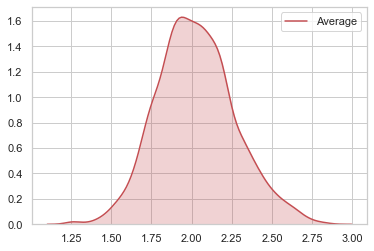

In [112]:
sns.kdeplot(df['Average'], shade=True, color="r")

* <b> <font color='green'>Dist Plot</font>: We use it for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.</b>

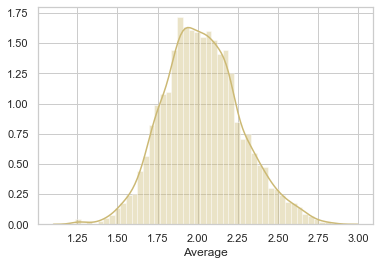

In [113]:
sns.distplot(df['Average'],color="y") 

* This graph shows normal distribution of the data

* <b> <font color='red'>RugPlot</font>: This shows every single data point on the x-axis, allowing us to visualize all of the actual values</b>

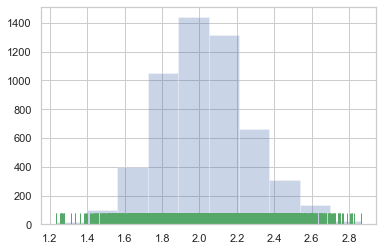

In [114]:
# use histogram and rugplot together 
plt.hist(df['Average'], alpha=.3)
sns.rugplot(df['Average'], color="g")

In [115]:
gym_data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,churn
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,NaN
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,NaN
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,NaN
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,NaN
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,NaN


## Spliting the data

* Split data in feature data and target data

In [116]:
feature_data = gym_data.drop(columns=['churn'])
target_data = gym_data['churn']

In [118]:
feature_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [125]:
target_data.describe()

count     5456
unique       2
top          1
freq      2861
Name: churn, dtype: object

* Split data in train and test

In [126]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)

### RandomForestClassifier in pipeline 

In [129]:
pipeline = make_pipeline (MinMaxScaler(),SimpleImputer(), RandomForestClassifier())

In [130]:
pipeline.fit(trainX, trainY)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [132]:
pipeline.score(testX, testY)

0.8951612903225806

* Let's check the accuracy of the model using confusion matrix

In [152]:
confusion_matrix(testY,pipeline.predict(testX))

array([[587,  57],
       [ 86, 634]], dtype=int64)

* Now we'll do feature selection using 'RFC feature_importances'

In [143]:
imp_feature = pipeline.steps[2][1].feature_importances_

In [155]:
# again creating pipeline with feature selection
pipeline = make_pipeline(SimpleImputer(),MinMaxScaler(),SelectKBest(k=15, score_func=f_classif),RandomForestClassifier(n_estimators=100))

In [156]:
pipeline.fit(trainX, trainY)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('selectkbest', SelectKBest(k=15)),
                ('randomforestclassifier', RandomForestClassifier())])

In [157]:
pipeline.score(testX, testY)

0.876099706744868

### It's Time for Hyper-parameter tunning Grid Search

In [161]:
params = {'selectkbest__k':[15,20,24], 'randomforestclassifier__n_estimators':[100,200,250]}

In [162]:
gs = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=4)

In [163]:
gs.fit(trainX, trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('selectkbest', SelectKBest(k=15)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'randomforestclassifier__n_estimators': [100, 200,
                                                                  250],
                         'selectkbest__k': [15, 20, 24]})

In [164]:
gs.best_params_

{'randomforestclassifier__n_estimators': 100, 'selectkbest__k': 24}

In [165]:
gs.best_score_

0.8939385797576508

### Logistic Regression in pipeline

In [166]:
pipeline = make_pipeline(SimpleImputer(),MinMaxScaler(),SelectKBest(k=15, score_func=f_classif),LogisticRegression())

In [167]:
pipeline.fit(trainX,trainY)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('selectkbest', SelectKBest(k=15)),
                ('logisticregression', LogisticRegression())])

In [168]:
pipeline.score(trainX,trainY)

0.8186705767350929

* RandomForest is best predict model for dataset